# COVID 19 Global Status Live Tracker; Updated BigQuery Table


## Emon K. Butts
### *Last Updated:* 04/29/2020

___

## SUMMARY

The purpose of this micro project is to create a Global COVID-19 tracker to view the global spread and impact of the virus. I found this project relevant given that everyone is in some way affected by the impact of the COVID 19 virus.  This dataset sitting in a BigQuery database includes the current number of confirmed cases, recoveries and deaths by country and region everyday from Jan 22 to Present.

![https://sites.usc.edu/coronavirus/](2._covid.jpg)

___


### *TABLE OF CONTENTS:*

### 1. Import Modules and Define the Display Settings of Pandas DataFrames 

### 2. Connect to BigQuery and Retrieve the Dataset

### 3. Describe the Dataset

### 4. Visualize the Global Impact ( Confirmed Cases, Recoveries & Deaths)


___


## 1. Import Modules and Define the Display Settings of Pandas DataFrames

In [1]:
# import modules

import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt

# how to display dataframes

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## 2. Connect to BigQuery and Retrieve the Data

Connecing the dataset to a open BiqQuery table updated daily, tracking the number of confirmed, recovery and death cases related to the the COVID 19 virus. The below code excutes this process by:

1. Providing credentaial for access to Google Clous


2. Create a SQL Query.


3. Execute the SQL Query and return the results to a pandas dataframe.


4. Lastly, a preview of the data is displayed.



In [2]:
# Setting Credentials

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='enter credentials here'

# connection to BigQuery

bigquery_client = bigquery.Client()

# query to be executed.

Query = """

    SELECT
    *
    FROM 
    `bigquery-public-data.covid19_jhu_csse.summary`

"""
# run the query

query_job = bigquery_client.query(Query)

# save to a pandas dataframe

data = query_job.to_dataframe()


# previw the datset

data.head(20)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,None,France,2020-02-01,NaN,NaN,None,6.0,0.0,0.0,NaN,None,None,None
1,None,United Arab Emirates,2020-02-07,NaN,NaN,None,5.0,0.0,0.0,NaN,None,None,None
2,None,Singapore,2020-02-29,NaN,NaN,None,102.0,0.0,72.0,NaN,None,None,None
3,None,Algeria,2020-02-26,NaN,NaN,None,1.0,0.0,0.0,NaN,None,None,None
4,None,Brazil,2020-01-23,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None
5,None,Finland,2020-02-13,NaN,NaN,None,1.0,0.0,1.0,NaN,None,None,None
6,None,India,2020-02-13,NaN,NaN,None,3.0,0.0,0.0,NaN,None,None,None
7,None,Belgium,2020-02-28,NaN,NaN,None,1.0,0.0,1.0,NaN,None,None,None
8,None,South Korea,2020-02-08,NaN,NaN,None,24.0,0.0,1.0,NaN,None,None,None
9,None,United Arab Emirates,2020-02-14,NaN,NaN,None,8.0,0.0,1.0,NaN,None,None,None


## 3. Describe the Dataset

How big is the dataset (i.e. rows and columns)?

In [3]:
# how big is the dataset (i.e. rows & coumns)?

data.shape

(123698, 13)

How many entries are there in the table?

In [4]:
# how many entries are there in the dataset?

data.size

1608074

Information about the datasets datatypes, filled entries and memory usage.

In [5]:
# information about the dataset (e.g. # of non-null values, datatypes and total memory usage).

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123698 entries, 0 to 123697
Data columns (total 13 columns):
province_state    113697 non-null object
country_region    123698 non-null object
date              123698 non-null object
latitude          119254 non-null float64
longitude         119254 non-null float64
location_geom     119254 non-null object
confirmed         123679 non-null float64
deaths            123257 non-null float64
recovered         123310 non-null float64
active            116081 non-null float64
fips              105548 non-null object
admin2            106030 non-null object
combined_key      116081 non-null object
dtypes: float64(6), object(7)
memory usage: 12.3+ MB


What are the unique provices and states in the dataset?

In [6]:
# list the unique values in the 

# unique provinces and states

unq_pr_st = []
 
for item in data.province_state: 
    if item not in unq_pr_st: 
        unq_pr_st.append(item)
    
print('Unique Provices/States:')       
list(unq_pr_st)


Unique Provices/States:


[None,
 'UK',
 'US',
 'Guam',
 'Iowa',
 'None',
 'Ohio',
 'Utah',
 'Anhui',
 'Aruba',
 'Gansu',
 'Hebei',
 'Henan',
 'Hubei',
 'Hunan',
 'Idaho',
 'Jilin',
 'Macau',
 'Maine',
 'Texas',
 'Tibet',
 'Yukon',
 'Alaska',
 'France',
 'Fujian',
 'Hainan',
 'Hawaii',
 'Kansas',
 'Nevada',
 'Oregon',
 'Quebec',
 'Shanxi',
 'Taiwan',
 'Yunnan',
 'Alabama',
 'Alberta',
 'Arizona',
 'Bavaria',
 'Beijing',
 'Bermuda',
 'Chicago',
 'Curacao',
 'Denmark',
 'Florida',
 'Georgia',
 'Guangxi',
 'Guizhou',
 'Indiana',
 'Jiangsu',
 'Jiangxi',
 'Mayotte',
 'Montana',
 'Ningxia',
 'Ontario',
 'Qinghai',
 'Reunion',
 'Shaanxi',
 'Sichuan',
 'Tianjin',
 'Vermont',
 'Wyoming',
 'Anguilla',
 'Arkansas',
 'Colorado',
 'Delaware',
 'Illinois',
 'Kentucky',
 'Liaoning',
 'Manitoba',
 'Maryland',
 'Michigan',
 'Missouri',
 'Nebraska',
 'New York',
 'Oklahoma',
 'Shandong',
 'Shanghai',
 'Tasmania',
 'Victoria',
 'Virginia',
 'Xinjiang',
 'Zhejiang',
 'Chongqing',
 'Gibraltar',
 'Greenland',
 'Guangdong',
 'Hong Ko

What are the unique countries and regions in the dataset?

In [7]:
# unique country and region

unq_co_rg = []
 
for item in data.country_region: 
    if item not in unq_co_rg: 
        unq_co_rg.append(item)
        
print('Unique Country/Region:')       
list(unq_co_rg)

Unique Country/Region:


['France',
 'United Arab Emirates',
 'Singapore',
 'Algeria',
 'Brazil',
 'Finland',
 'India',
 'Belgium',
 'South Korea',
 'Spain',
 'Austria',
 'Iran',
 'Vietnam',
 'Cambodia',
 'Nepal',
 'Thailand',
 'Georgia',
 'Lebanon',
 'Malaysia',
 'Colombia',
 'Diamond Princess',
 'North Ireland',
 'Japan',
 'Germany',
 'Oman',
 'Philippines',
 'Russia',
 'Sweden',
 'San Marino',
 'Egypt',
 'Sri Lanka',
 'MS Zaandam',
 'Croatia',
 'Australia',
 'UK',
 'Switzerland',
 'Pakistan',
 'Mexico',
 'Italy',
 'Estonia',
 'Azerbaijan',
 'North Macedonia',
 'Israel',
 'Bahrain',
 'Greece',
 'New Zealand',
 'Kuwait',
 'Norway',
 'Denmark',
 'Afghanistan',
 'Netherlands',
 'Iraq',
 'Romania',
 'Belarus',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Lithuania',
 'Iceland',
 'Monaco',
 'Ivory Coast',
 'Qatar',
 'Zimbabwe',
 'Namibia',
 'East Timor',
 'Chile',
 'Yemen',
 'Cabo Verde',
 'Czechia',
 'Czech Republic',
 'Reunion',
 'Saudi Arabia',
 'Antigua and Barbuda',
 'Nicaragua',
 'Tanzania',
 'Republic of the C

What is the skew of the numerical data?

In [8]:
# what is the skew of the continous data?

data.skew()

latitude     -3.177689
longitude     3.026934
confirmed    21.803985
deaths       30.520391
recovered    27.677769
active       19.044965
dtype: float64

Quickly describe the discriptive statistics around the datasets.

In [9]:
# quickly calculate some descriptive statistics for the dataset.

data.describe()

,latitude,longitude,confirmed,deaths,recovered,active
count,119254.000000,119254.000000,123679.000000,123257.000000,123310.000000,116081.000000
mean,36.348980,-77.677116,546.228543,33.661634,142.053613,329.343932
std,10.878976,46.308778,6026.226918,594.437254,2571.241114,3978.492621
min,-51.796300,-170.132000,0.000000,0.000000,0.000000,-115936.000000
25%,33.621901,-96.038025,2.000000,0.000000,0.000000,0.000000
50%,37.841579,-87.356027,9.000000,0.000000,0.000000,0.000000
75%,41.608600,-80.258170,50.000000,1.000000,0.000000,18.000000
max,72.000000,178.065000,232128.000000,27359.000000,123903.000000,144656.000000


**What are the current countries with the largest amount of confirmed cases, recoveries and deaths?**

1. Countries Sorted by Confirmed Cases.

In [10]:

# Countries sorted by confirmed cases

data[['country_region', 'date','confirmed','recovered', 'deaths']].groupby(['country_region']).max().sort_values('confirmed', ascending=False)

,date,confirmed,recovered,deaths
country_region,,,,
Spain,2020-04-28,232128.0,123903.0,23822.0
Italy,2020-04-28,201505.0,68941.0,27359.0
France,2020-04-28,167605.0,46886.0,23660.0
US,2020-04-28,162338.0,115936.0,17682.0
United Kingdom,2020-04-28,161145.0,352.0,21678.0
Germany,2020-04-28,159912.0,117400.0,6314.0
Turkey,2020-04-28,114653.0,38809.0,2992.0
Russia,2020-04-28,93558.0,8456.0,867.0
Iran,2020-04-28,92584.0,72439.0,5877.0


2. Countries Sorted by Recovered Cases.

In [11]:
# Countries sorted by recovered cases

data[['country_region','date','confirmed','recovered', 'deaths']].groupby(['country_region']).max().sort_values('recovered', ascending=False)

,date,confirmed,recovered,deaths
country_region,,,,
Spain,2020-04-28,232128.0,123903.0,23822.0
Germany,2020-04-28,159912.0,117400.0,6314.0
US,2020-04-28,162338.0,115936.0,17682.0
Iran,2020-04-28,92584.0,72439.0,5877.0
Italy,2020-04-28,201505.0,68941.0,27359.0
China,2020-04-28,68128.0,64435.0,4512.0
Mainland China,2020-03-12,67760.0,47743.0,3024.0
France,2020-04-28,167605.0,46886.0,23660.0
Turkey,2020-04-28,114653.0,38809.0,2992.0


3. Countries Sorted by Death Cases.

In [12]:
# Countries sorted by death cases

data[['country_region','date','confirmed','recovered', 'deaths']].groupby(['country_region']).max().sort_values('deaths', ascending=False)

,date,confirmed,recovered,deaths
country_region,,,,
Italy,2020-04-28,201505.0,68941.0,27359.0
Spain,2020-04-28,232128.0,123903.0,23822.0
France,2020-04-28,167605.0,46886.0,23660.0
United Kingdom,2020-04-28,161145.0,352.0,21678.0
US,2020-04-28,162338.0,115936.0,17682.0
Belgium,2020-04-28,47334.0,10943.0,7331.0
Germany,2020-04-28,159912.0,117400.0,6314.0
Iran,2020-04-28,92584.0,72439.0,5877.0
Brazil,2020-04-28,73235.0,32544.0,5083.0


##  4. GLOBAL IMPACT

### A. Create a Global Dataset by Aggregating the Data by Date and Summing the Activity for Each Day.

In [13]:
global_data = data.groupby(['date']).sum().sort_values(['date'], ascending=True)

global_data.head()

,latitude,longitude,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,0.0,0.0,555.0,17.0,28.0,0.0
2020-01-23,0.0,0.0,653.0,18.0,30.0,0.0
2020-01-24,0.0,0.0,941.0,26.0,36.0,0.0
2020-01-25,0.0,0.0,1438.0,42.0,39.0,0.0
2020-01-26,0.0,0.0,2118.0,56.0,52.0,0.0


In [14]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### B. Plot The Number of COVID-19 Confirmed, Recovery and Death Cases Globally from Jan 22  - Present.

The below was achieved by summing the confirmed cases aggregated by date.

Text(0, 0.5, 'Cases')

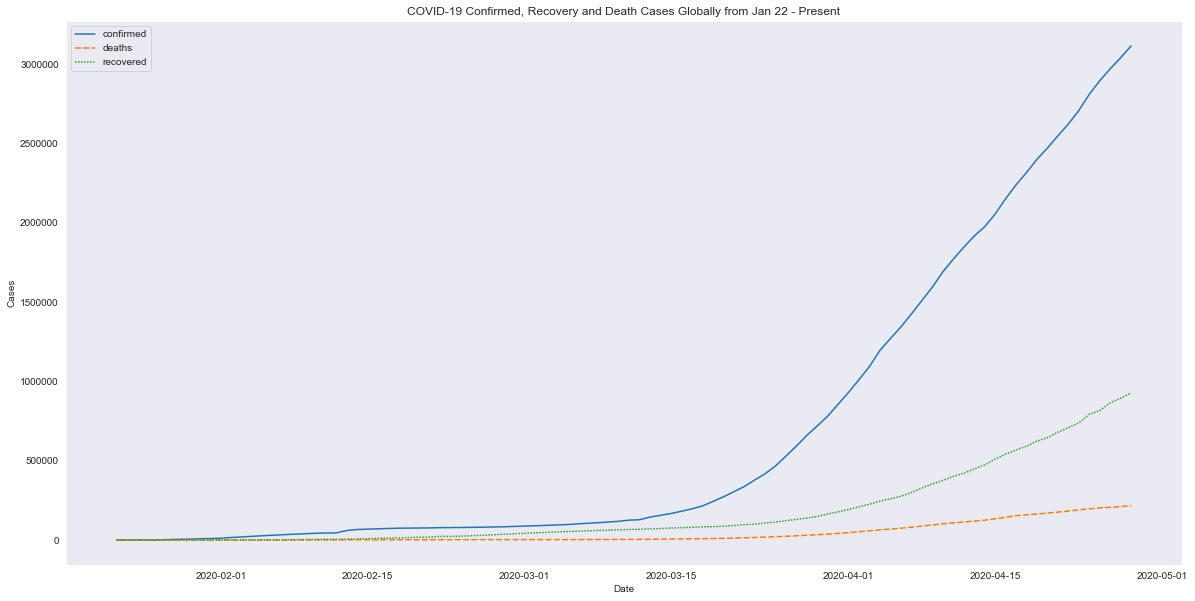

In [15]:
# change the style of the figure to the "dark" theme
sns.set_style("dark")
# size of the figure
plt.figure(figsize=(20,10))
# add title
plt.title('COVID-19 Confirmed, Recovery and Death Cases Globally from Jan 22 - Present')
# add lines
sns.lineplot(data=global_data[['confirmed','deaths','recovered']])
# add x axis label
plt.xlabel("Date")
# add y axis label
plt.ylabel("Cases")